# Supervised Learning: Linear Regression

### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df = pd.read_csv("audi.csv")

display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


### Data Preprocessing

#####  Label Encoding

In [3]:
print(df['model'].unique())
print(len(df['model'].unique()))

print(df['transmission'].unique())
print(df['fuelType'].unique())


[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
26
['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']


In [4]:
df['model'] = df['model'].replace({' A1':0, ' A6':1, ' A4':2, ' A3':3, ' Q3':4, ' Q5':5, ' A5':6, ' S4':7, ' Q2':8, ' A7':9,
                                    ' TT':10, ' Q7':11, ' RS6':12, ' RS3':13, ' A8':14, ' Q8':15, ' RS4':16, ' RS5':17, 
                                    ' R8':18, ' SQ5':19, ' S8':20, ' SQ7':21, ' S3':22,' S5':23, ' A2':24, ' RS7':25})

df['transmission'] = df['transmission'].replace({'Manual':0, 'Automatic':1, 'Semi-Auto':2 })
df['fuelType'] = df['fuelType'].replace({'Petrol':0, 'Diesel':1, 'Hybrid':2 })


display(df.head())
# list(data) or
print("The Columns are: \n" , df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,0,2017,12500,0,15735,0,55.4,1.4
1,1,2016,16500,1,36203,1,64.2,2.0
2,0,2016,11000,0,29946,0,55.4,1.4
3,2,2017,16800,1,25952,1,67.3,2.0
4,3,2019,17300,0,1998,0,49.6,1.0


The Columns are: 
 Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


### Separating the features and target variable

In [5]:
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(10668, 7) (10668, 1)


### Create train and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 7) (2134, 7) (8534, 1) (2134, 1)


### Linear Regression

##### Training with Linear Regression

In [7]:
model = LinearRegression()
model = model.fit(X_train, y_train)

##### Linear Regression Coefficients and intercept

In [8]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
4,fuelType,-238.951119
5,mpg,-113.855503
3,mileage,-0.088432
0,model,547.646561
2,transmission,688.186725
1,year,2094.730665
6,engineSize,8924.853016


In [9]:
model.intercept_

array([-4214580.92824985])

### Prediction

In [10]:
y_pred = model.predict(X_test)

### Prediction Error

In [11]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MSE = mean_squared_error(y_test, y_pred, squared=True)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", RMSE)
print("MSE:", MAE)
print("MAE:", MAE)
print("MAPE:", MAPE)

RMSE: 5497.646125328496
MSE: 3493.69238727086
MAE: 3493.69238727086
MAPE: 0.17131547292120894


<ipython-input-12-1b8fde3b9f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred
<ipython-input-12-1b8fde3b9f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()


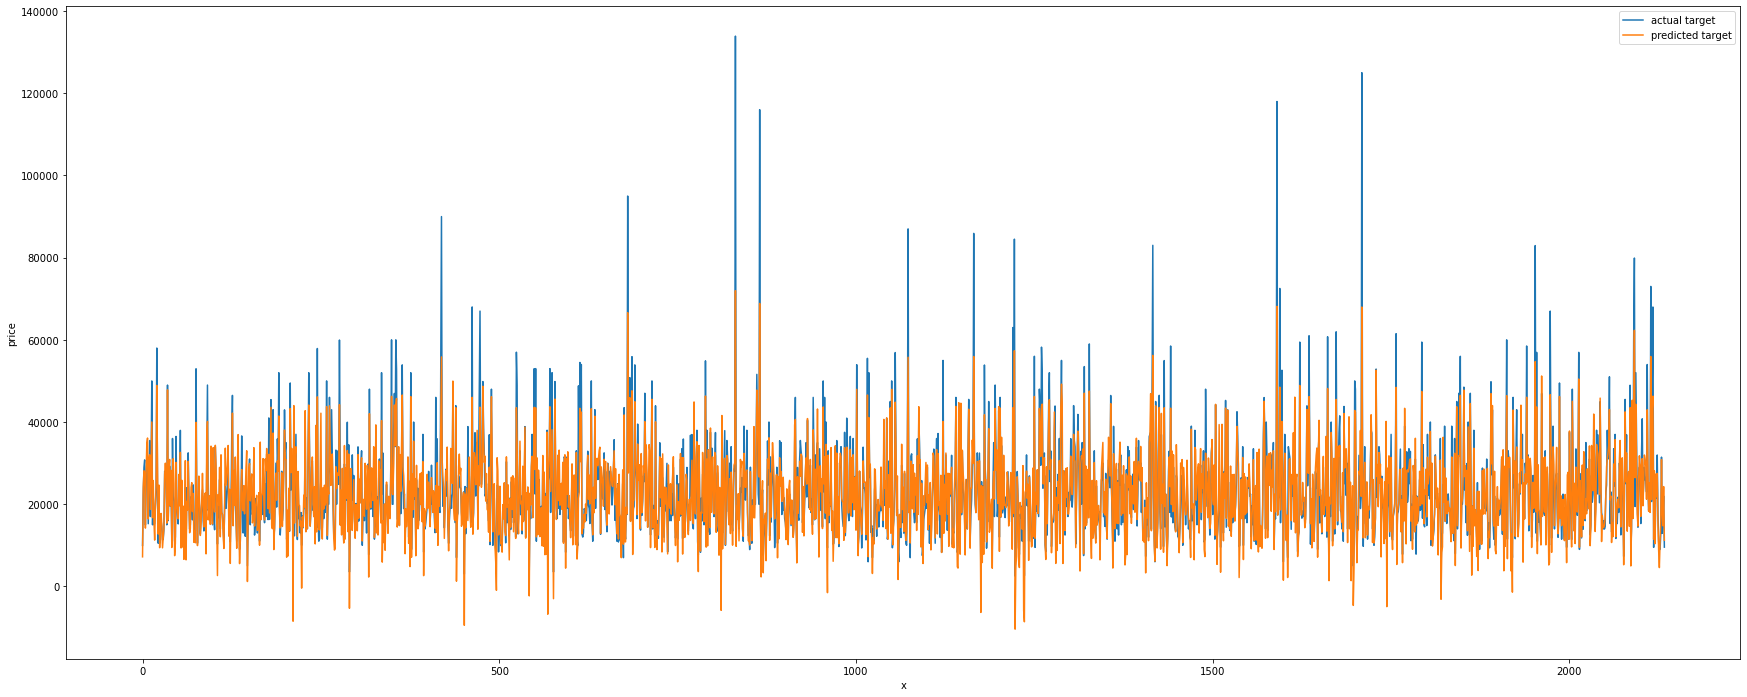

In [12]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()